In [ ]:
!kaggle datasets download -d manishmathias/residential-property-price-indian-cities-dataset

Dataset URL: https://www.kaggle.com/datasets/manishmathias/residential-property-price-indian-cities-dataset
License(s): unknown
 42% 9.00M/21.7M [00:00<00:00, 32.5MB/s]
100% 21.7M/21.7M [00:00<00:00, 67.2MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('residential-property-price-indian-cities-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
import pandas as pd
import pandas as pd

# Ignore the SettingWithCopyWarning
pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

data=pd.read_csv("/content/Makaan_Properties_Buy.csv",encoding="latin-1")

In [ ]:
#Data reduction
for column in data.columns:
    print(data[column].value_counts())

new_data=data.drop(['Property_Name','Property_id','Builder_name','Price_per_unit_area','Posted_On','Project_URL','builder_id','Builder_name','City_id','Locality_ID','description','listing_domain_score','Listing_Category','Sub_urban_ID','Longitude','Latitude','is_commercial_Listing','is_PentaHouse','Property_building_status','is_studio'], axis=1)

Property_Name
Purvanchal vihar                          6325
B kumar and brothers the passion group    5846
Ambey valley                              3518
abcd                                      1651
Dreams valley                             1629
                                          ... 
Silver Vista                                 1
Silver Prestige                              1
Z Residences                                 1
Sukhsathi apartment                          1
Hallmark Haptom Orakshir                     1
Name: count, Length: 34387, dtype: int64
Property_id
6857157     773
5666841     479
10565898    439
9389129     417
5313548     340
           ... 
14342546      1
14342532      1
13882680      1
10385132      1
14683740      1
Name: count, Length: 207363, dtype: int64
Property_type
Apartment            188922
Residential Plot      93765
Independent Floor     22554
Independent House     13553
Villa                 13302
Name: count, dtype: int64
Property_status
Re

In [ ]:
data=new_data
print(data)

       Property_type     Property_status  City_name No_of_BHK Locality_Name  \
0          Apartment  Under Construction  Ahmedabad     3 BHK         Bopal   
1          Apartment  Under Construction  Ahmedabad     4 BHK         Ambli   
2          Apartment       Ready to move  Ahmedabad     3 BHK    Naryanpura   
3          Apartment       Ready to move  Ahmedabad     2 BHK     Changodar   
4          Apartment  Under Construction  Ahmedabad     3 BHK        Shilaj   
...              ...                 ...        ...       ...           ...   
332091     Apartment  Under Construction     Mumbai     1 BHK         Vasai   
332092     Apartment  Under Construction     Mumbai     1 BHK         Vasai   
332093     Apartment  Under Construction     Mumbai     1 BHK         Vasai   
332094     Apartment  Under Construction     Mumbai     2 BHK         Vasai   
332095     Apartment  Under Construction     Mumbai     1 BHK         Vasai   

              Price         Size        Sub_urban_n

In [ ]:
print(data.isna().sum())

#Data Cleaning
#Removing NaN values
data['Property_status'].value_counts()
data['Property_status']=data['Property_status'].fillna(data['Property_status'].mode()[0])
print(data['Property_status'].isna().sum())
print(data.isna().sum())

Property_type             0
Property_status       60442
City_name                 0
No_of_BHK                 0
Locality_Name             2
Price                     0
Size                      0
Sub_urban_name            0
is_furnished              0
is_plot                   0
is_RERA_registered        0
is_Apartment              0
is_ready_to_move          0
dtype: int64
0
Property_type         0
Property_status       0
City_name             0
No_of_BHK             0
Locality_Name         2
Price                 0
Size                  0
Sub_urban_name        0
is_furnished          0
is_plot               0
is_RERA_registered    0
is_Apartment          0
is_ready_to_move      0
dtype: int64


In [ ]:
mode = data.groupby('City_name')['Locality_Name'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')

data['Locality_Name'] = data['Locality_Name'].fillna(data['City_name'].map(mode))
data['Locality_Name'].isna().sum()


0

In [ ]:
#Converting number of BHK to numeric
data['No_of_BHK'] = data['No_of_BHK'].str.findall('(\d+)')
data['No_of_BHK']=data['No_of_BHK'].apply(lambda x: int(x[0]))
data['No_of_BHK']

0         3
1         4
2         3
3         2
4         3
         ..
332091    1
332092    1
332093    1
332094    2
332095    1
Name: No_of_BHK, Length: 332096, dtype: int64

In [ ]:
#Converting price & size columns to numeric
def price_size(x):
    s=''
    for i in x:
        s=s+str(i)
    return int(s)

data['Price'] = data['Price'].str.findall('(\d+)').apply(price_size)
data['Size'] = data['Size'].str.findall('(\d+)').apply(price_size)

data[['Size','Price']]

Size     Price
0       1750   7500000
1       3384  23688000
2       2295  13200840
3        918   2283000
4       1760   9371000
...      ...       ...
332091   346   3400000
332092   426   3650000
332093   360   3550000
332094   590   5200000
332095   358   3529577

[332096 rows x 2 columns]

In [ ]:
# #Replacing No_of_BHK=0 with median of column
# print(data['No_of_BHK'].value_counts())
# # print(data[data['No_of_BHK']==0])

# bhk=data['No_of_BHK']
# bhk[bhk==0]=bhk.median()

# data['No_of_BHK']=bhk.copy()
# data=data[data['No_of_BHK']<=10]
# data.shape

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import pearsonr

# List of categorical columns and numerical columns
cat = data.select_dtypes("object").columns.to_list() + data.select_dtypes(include=['bool']).columns.to_list()
categorical_cols = cat
numerical_cols = ['No_of_BHK', 'Size']



pd.set_option('display.float_format', '{:.2f}'.format)

# Prepare the categorical features and target variable
X_cat = data[categorical_cols].astype(str).apply(lambda x: pd.factorize(x)[0])
y_cat = data['Price']

# Perform feature selection using chi-square test
chi2_selector = SelectKBest(chi2, k='all').fit(X_cat, y_cat)

# Get the selected feature column names and their corresponding chi2 scores
selected_features = pd.Series(chi2_selector.scores_, index=X_cat.columns)

# Sort the selected features in descending order based on chi2 scores
sorted_features = selected_features.sort_values(ascending=False)

print('Selected categorical features using Chi-Squared Test (sorted in descending order):')
print(sorted_features)


#  Perform feature selection using Correlation Coefficient for numerical features
X_num = data[numerical_cols]
y_num = data['Price']

num_cols = [column for column in numerical_cols if abs(pearsonr(X_num[column], y_num)[0]) > 0.05]
print('Selected numerical features: ', num_cols)



Selected categorical features using Chi-Squared Test (sorted in descending order):
Locality_Name        91813001.17
Sub_urban_name        1758845.15
Property_type          451582.15
is_plot                166734.24
City_name              132838.69
is_Apartment            93983.61
is_furnished            86569.20
is_ready_to_move        61897.05
Property_status         38448.70
is_RERA_registered      28605.36
dtype: float64
Selected numerical features:  ['No_of_BHK', 'Size']


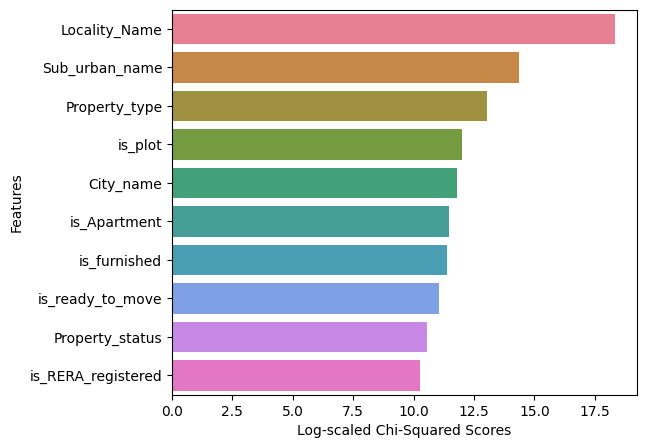

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot Chi-Squared scores
plt.figure(figsize=(6, 5))
sns.barplot(x=np.log1p(sorted_features.values), y=sorted_features.index, palette='husl')  # loge(1+x)
# plt.title('Log-scaled Chi-Squared scores for categorical features')
plt.xlabel('Log-scaled Chi-Squared Scores')
plt.ylabel('Features')
# plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#Removing 2 new extra columns After feature selection
data.drop(['is_RERA_registered','Property_status'], axis=1,inplace=True)


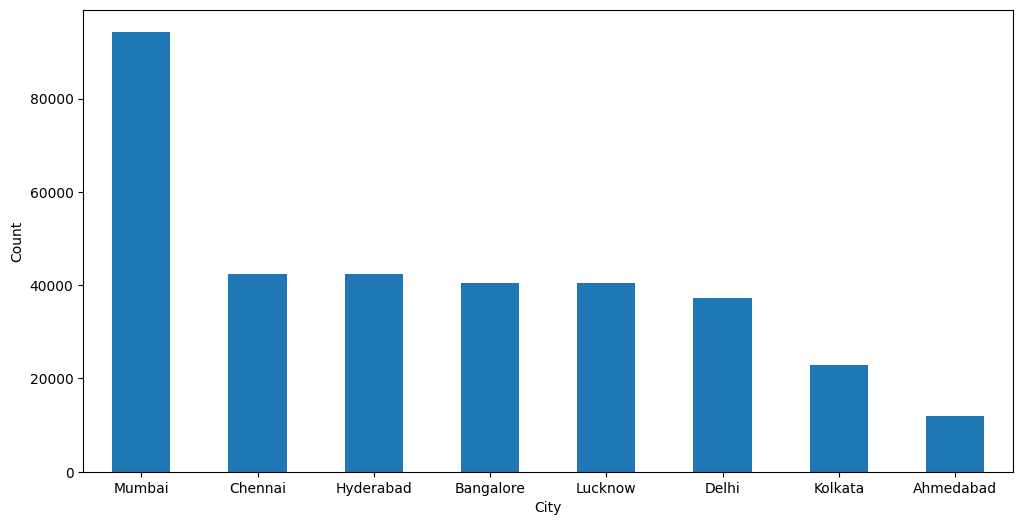

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data['City_name'].value_counts().plot(kind='bar')
# plt.title('Property Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.show()

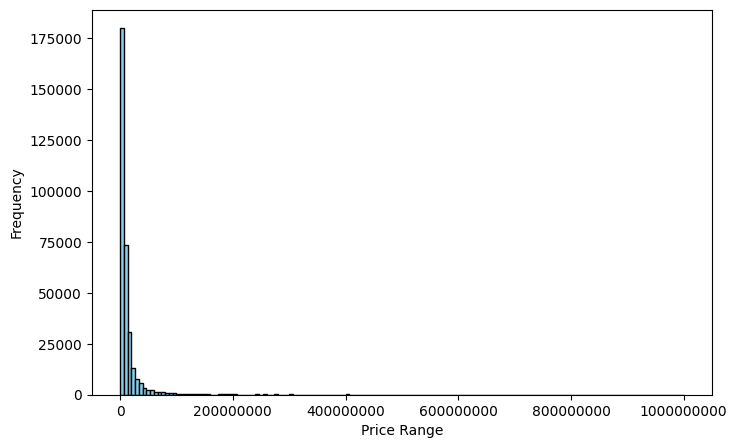

In [ ]:
plt.figure(figsize=(8, 5))

plt.hist(data['Price'], bins=150, color='skyblue', edgecolor='black')

plt.xlabel('Price Range')
plt.ylabel('Frequency')
# plt.title('Price Distribution Histogram ')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

<Axes: >

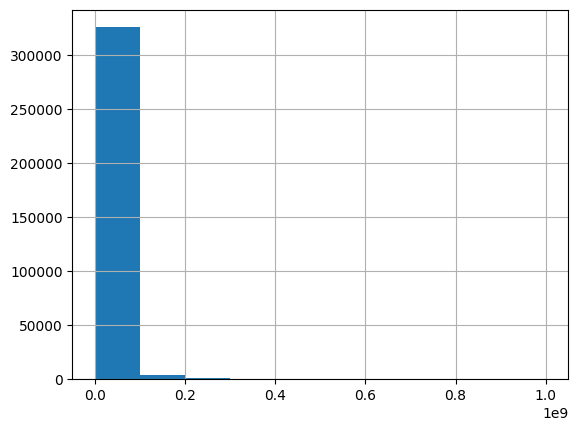

In [ ]:
data['Price'].hist()

In [ ]:
#Boxplot to see outliers in number of BHK column
import plotly.express as px

fig = px.box(data,x='No_of_BHK')
fig.show()

In [ ]:
#Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

print(data['Property_type'].value_counts())
# print(data['Property_status'].value_counts())
encoding_columns = ['Property_type','is_ready_to_move','City_name','Locality_Name','Sub_urban_name','is_furnished','is_plot' ,'is_Apartment' ]

for i in encoding_columns:

    encoder = LabelEncoder()

    encoder.fit(data[i])

    data[i] = encoder.transform(data[i])
    print(data[i].value_counts())


Property_type
Apartment            188922
Residential Plot      93765
Independent Floor     22554
Independent House     13553
Villa                 13302
Name: count, dtype: int64
Property_type
0    188922
3     93765
1     22554
2     13553
4     13302
Name: count, dtype: int64
is_ready_to_move
1    179800
0    152296
Name: count, dtype: int64
City_name
7    94339
2    42441
4    42344
1    40463
6    40380
3    37198
5    22981
0    11950
Name: count, dtype: int64
Locality_Name
4435    10678
2751    10315
4299     4388
1117     3491
3129     3123
        ...  
3524        1
4190        1
2119        1
1576        1
3801        1
Name: count, Length: 5046, dtype: int64
Sub_urban_name
81    45080
58    17138
6     16518
66    14019
16    12673
      ...  
46        2
18        1
95        1
86        1
47        1
Name: count, Length: 101, dtype: int64
is_furnished
2    245783
1     72042
0     14271
Name: count, dtype: int64
is_plot
0    238331
1     93765
Name: count, dtype: int64
is

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Property_type     332096 non-null  int64
 1   City_name         332096 non-null  int64
 2   No_of_BHK         332096 non-null  int64
 3   Locality_Name     332096 non-null  int64
 4   Price             332096 non-null  int64
 5   Size              332096 non-null  int64
 6   Sub_urban_name    332096 non-null  int64
 7   is_furnished      332096 non-null  int64
 8   is_plot           332096 non-null  int64
 9   is_Apartment      332096 non-null  int64
 10  is_ready_to_move  332096 non-null  int64
dtypes: int64(11)
memory usage: 27.9 MB


In [ ]:
print("Mean of Price attribute ",data['Price'].mean())
print("Median of Price attribute ",data['Price'].median())
print("Mean of Size attribute ",data['Size'].mean())
print("Median of Size attribute ",data['Size'].median())


Mean of Price attribute  15362954.368824074
Median of Price attribute  6000000.0
Mean of Size attribute  1555.5965895403738
Median of Size attribute  1103.0


In [ ]:
import plotly.express as px

fig = px.box(data,x='Size')
fig.update_xaxes(tickformat='f')
fig.update_layout(xaxis_title="Size (In Sq. Ft.)",width=800, height=600)
fig.show()

# plt.figure(figsize=(6, 3))
# sns.boxplot(data['Size'])
# plt.title('Size outliers')
# plt.show()

In [ ]:

def replace_outliers_size(x):
    lower_bound = 400
    upper_bound = 4000

    # Replace outliers with the mean of the other (non-outlier) values in the group
    x[(x < lower_bound) | (x > upper_bound)] = x[(x >= lower_bound) & (x <= upper_bound)].mean()
    return x

# Apply the function to each group of values
data['Size'] = data.groupby('No_of_BHK')['Size'].transform(replace_outliers_size)


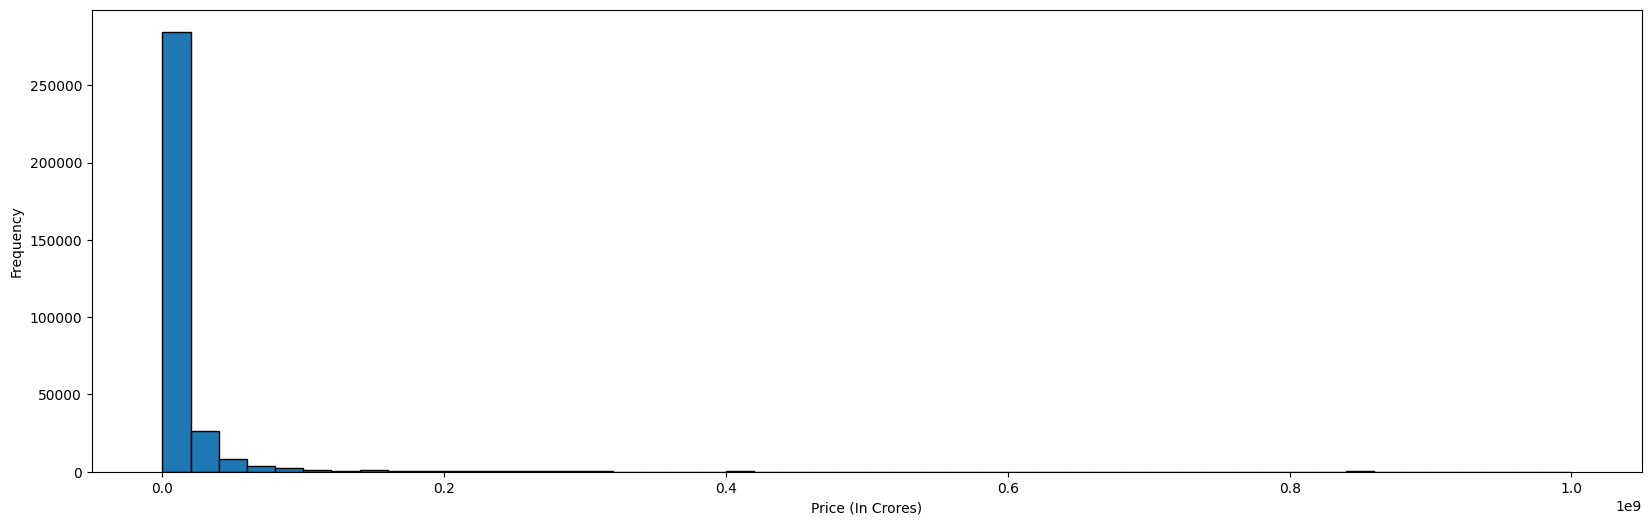

In [ ]:
# plt.figure(figsize=(20, 6))

# plt.hist(data['Price'], bins=50, edgecolor='black')

# plt.xlabel('Price (In Crores)')
# plt.ylabel('Frequency')
# # plt.title('Price Distribution Histogram ')
# plt.show()

In [ ]:
fig = px.histogram(data,x='Price',nbins=150)
# Disable both offset and scientific notation
fig.update_xaxes(tickformat='f')
# Customize the figure size (e.g., width=800 pixels, height=400 pixels)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
# fig = px.scatter(x=data['Price'],y=data['Size'])
# fig.show()

fig = px.box(data,x='Price')
fig.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(data['Price'])
# plt.title('Price outliers')
# plt.show()

def replace_outliers_price(x):
    lower_bound = 1000000
    upper_bound = 500000000

    # Replace outliers with the mean of the other (non-outlier) values in the group
    x[(x < lower_bound) | (x > upper_bound)] = x[(x >= lower_bound) & (x <= upper_bound)].mean()
    return x

# Apply the function to each group of values
data['Price'] = data.groupby('No_of_BHK')['Price'].transform(replace_outliers_price)


In [ ]:
for i in data.columns:
    print(data[i].value_counts())

Property_type
0    188922
3     93765
1     22554
2     13553
4     13302
Name: count, dtype: int64
City_name
7    94339
2    42441
4    42344
1    40463
6    40380
3    37198
5    22981
0    11950
Name: count, dtype: int64
No_of_BHK
0     93765
2     93112
3     74449
1     42562
4     22533
5      3596
6       976
10      327
7       314
8       256
9       161
15       15
12       14
11       14
14        2
Name: count, dtype: int64
Locality_Name
4435    10678
2751    10315
4299     4388
1117     3491
3129     3123
        ...  
3524        1
4190        1
2119        1
1576        1
3801        1
Name: count, Length: 5046, dtype: int64
Price
6458236.11     29266
6500000.00      2705
5500000.00      2640
4500000.00      2574
6000000.00      2541
               ...  
13975004.00        1
5435100.00         1
5414500.00         1
5531500.00         1
3529577.00         1
Name: count, Length: 47285, dtype: int64
Size
1000.00    31121
1200.00     9709
1250.00     8249
1800.00     7442
6

In [ ]:
# #Z-Score
# import numpy as np
# from scipy import stats

# # # Assume 'price_column' is your pandas Series
# # price_column = data['Price']

# # # Calculate Z-scores
# # z_scores = np.abs(stats.zscore(price_column))

# # # Define a threshold to identify outliers
# # threshold = 3

# # # Identify outliers
# # outliers = price_column[z_scores > threshold]
# # print(outliers.min())
# # print(outliers.max())
# # # Replace outliers with median of the price_column
# # data_clean = price_column.copy()
# # data_clean[z_scores > threshold] = price_column.median()
# # data_clean[data_clean<1000000]=price_column.median()
# # print(float(data_clean.min()))
# # print(float(data_clean.max()))
# # data['Price']=data_clean

# #SIZE
# print("Size column")

# data1 = data['Size']
# print(data1.min())
# print(data1.max())
# # Calculate IQR
# Q1 = data1.quantile(0.25)
# Q3 = data1.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = (data1 < lower_bound) | (data1 > upper_bound)
# print(data1[outliers].min())
# print(data1[outliers].max())
# print(outliers.sum())

# # Replace outliers with median of the data
# data_clean = data1.copy()
# data_clean[outliers] = data1.mean()
# data_clean[data_clean<400]=data1.median()
# data_clean[data_clean>4000]=data1.median()
# print(float(data_clean.min()))
# print(float(data_clean.max()))
# # data['Size']=data_clean


In [ ]:
#Normalization
norm_columns = ['No_of_BHK','Size','Property_type','is_ready_to_move','City_name' ,'Locality_Name','Price', 'Sub_urban_name','is_furnished' ]

for i in norm_columns:

    min = data[i].min()
    max = data[i].max()

    def normalize_min_max(x):
        return ((x - min) / (max - min))*(1-0)+0

    data[i] = data[i].apply(normalize_min_max)

print(data.sample(20))


        Property_type  City_name  No_of_BHK  Locality_Name  Price  Size  \
19054            0.00       0.14       0.13           0.38   0.01  0.20   
186217           0.00       0.71       0.20           0.49   0.00  0.16   
156025           0.75       0.57       0.00           0.55   0.00  0.20   
188344           0.00       0.71       0.13           0.20   0.00  0.12   
131982           0.75       0.43       0.00           0.55   0.01  0.27   
248076           0.00       1.00       0.07           0.22   0.00  0.06   
13660            0.00       0.14       0.13           0.08   0.00  0.11   
157409           0.00       0.57       0.20           0.45   0.03  0.44   
66937            0.00       0.29       0.20           0.93   0.02  0.22   
39274            0.75       0.14       0.00           0.77   0.03  0.56   
56298            0.00       0.29       0.07           0.68   0.00  0.04   
298803           0.00       1.00       0.13           0.55   0.01  0.16   
147222           0.00    

In [ ]:
data.to_csv("BDA_Clean4.csv",index=False)

In [ ]:
# #Nnot feasible removing of outlier
# #IQR
# import numpy as np
# import pandas as pd

# # Assume 'data' is your pandas Series
# data1 = data['Price']
# print(data1.min())
# # Calculate IQR
# Q1 = data1.quantile(0.25)
# Q3 = data1.quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = (data1 < lower_bound) | (data1 > upper_bound)
# print(data1[outliers].min())
# print(data1[outliers].max())

# # Replace outliers with median of the data
# data_clean = data1.copy()
# data_clean[outliers] = data1.median()
# print(float(data_clean.min()))
# float(data_clean.max())

# #Size
# print("Size")
# size_column = data['Size']
# print(size_column.min())
# # Calculate Z-scores
# z_scores = np.abs(stats.zscore(size_column))

# # Define a threshold to identify outliers
# threshold = 3

# # Identify outliers
# outliers = size_column[z_scores > threshold]
# print(outliers.min())
# print(outliers.max())
# # Replace outliers with median of the price_column
# data_clean = size_column.copy()
# data_clean[z_scores > threshold] = size_column.mean()
# data_clean[data_clean<100]=size_column.mean()
# print(float(data_clean.min()))
# float(data_clean.max())

In [ ]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c91533fdb934b3db5d530c40dea4832c05452ce847b18d0083d8aa5c6ad64c80
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


#=======Training and Testin using Pyspark Algorithms========

#Random Forest Regression

In [ ]:
# ================================ Now using Pyspark Random Forest Regression====================
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Create a SparkSession with increased executor memory and cores
spark = SparkSession.builder \
    .appName('random_forest_regression') \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Assuming that data is your DataFrame and it's already in the correct format
data = spark.read.csv("BDA_Clean4.csv", header=True, inferSchema=True)

data = data.na.drop()

# Define the input columns for the vector assembler
input_cols = ['Property_type', 'is_ready_to_move', 'City_name', 'No_of_BHK', 'Locality_Name', 'Size', 'Sub_urban_name', 'is_furnished', 'is_plot', 'is_Apartment']

# Define the vector assembler
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="raw_features")

# Define the standard scaler to scale features
scaler = StandardScaler(inputCol="raw_features", outputCol="features", withStd=True, withMean=True)

# Define the random forest regressor
rf = RandomForestRegressor(labelCol="Price", featuresCol="features")

# Define the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, rf])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions_rf = model.transform(test_data)

# Define the regression evaluator with the metric
evaluator_rmse = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="mse")
evaluator_mae = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="r2")

# Compute the metrics
rmse = evaluator_rmse.evaluate(predictions_rf)
mse = evaluator_mse.evaluate(predictions_rf)
mae = evaluator_mae.evaluate(predictions_rf)
r2 = evaluator_r2.evaluate(predictions_rf)

# Print the metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2:", r2)



Root Mean Squared Error (RMSE): 0.03995294482616818
Mean Squared Error (MSE): 0.0015962378002828386
Mean Absolute Error (MAE): 0.014472391237203515
R2: 0.585166995574961


#Linear Regression:

In [ ]:

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("linear_regression").getOrCreate()

# Read the data
data = spark.read.csv("BDA_Clean4.csv", header=True, inferSchema=True)

# Define the input columns for the vector assembler
input_cols = ['Property_type', 'is_ready_to_move', 'City_name', 'No_of_BHK', 'Locality_Name', 'Size', 'Sub_urban_name', 'is_furnished', 'is_plot', 'is_Apartment']

# Define the vector assembler
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Define the standard scaler to scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Define the linear regression model
linear_reg = LinearRegression(labelCol="Price", featuresCol="scaled_features")

# Define the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, linear_reg])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions_lr = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_lr)
mse = evaluator.evaluate(predictions_lr, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions_lr, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions_lr, {evaluator.metricName: "r2"})

# Print the metrics
print("Linear Regression - RMSE:", rmse)
print("Linear Regression - MSE:", mse)
print("Linear Regression - MAE:", mae)
print("Linear Regression - R2:", r2)

# Additional Suggestions:
# - Check for multicollinearity among features.
# - Ensure that the data is properly preprocessed, handling missing values and outliers.
# - Verify linear regression assumptions: linearity, independence, homoscedasticity, and normality of residuals.
# - Explore other regression algorithms if linear regression is not suitable for your data.



Py4JJavaError: An error occurred while calling o520.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 34.0 failed 1 times, most recent failure: Lost task 1.0 in stage 34.0 (TID 60) (4758770bd707 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$3145/0x000000084134e840`: (struct<Property_type:double,is_ready_to_move:double,City_name:double,No_of_BHK:double,Locality_Name:double,Size:double,Sub_urban_name:double,is_furnished:double,is_plot_double_VectorAssembler_3e88d30ea512:double,is_Apartment_double_VectorAssembler_3e88d30ea512:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:162)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:84)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1(ObjectHashAggregateExec.scala:114)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1$adapted(ObjectHashAggregateExec.scala:90)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:880)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:880)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 28 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$3145/0x000000084134e840`: (struct<Property_type:double,is_ready_to_move:double,City_name:double,No_of_BHK:double,Locality_Name:double,Size:double,Sub_urban_name:double,is_furnished:double,is_plot_double_VectorAssembler_3e88d30ea512:double,is_Apartment_double_VectorAssembler_3e88d30ea512:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:162)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:84)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1(ObjectHashAggregateExec.scala:114)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1$adapted(ObjectHashAggregateExec.scala:90)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:880)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:880)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 28 more


#Decision Tree Regression:

In [ ]:

from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("decision_tree_regression").getOrCreate()

# Read the data
data = spark.read.csv("BDA_Clean4.csv", header=True, inferSchema=True)

# Define the input columns for the vector assembler
input_cols = ['Property_type', 'is_ready_to_move', 'City_name', 'No_of_BHK', 'Locality_Name', 'Size', 'Sub_urban_name', 'is_furnished', 'is_plot', 'is_Apartment']

# Define the vector assembler
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Define the standard scaler to scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Define the decision tree regression model with adjusted hyperparameters
decision_tree = DecisionTreeRegressor(labelCol="Price", featuresCol="scaled_features", maxDepth=10)  # Adjust maxDepth

# Define the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, decision_tree])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions_dt = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_dt)
mse = evaluator.evaluate(predictions_dt, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions_dt, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "r2"})

# Print the metrics
print("Decision Tree Regression - RMSE:", rmse)
print("Decision Tree Regression - MSE:", mse)
print("Decision Tree Regression - MAE:", mae)
print("Decision Tree Regression - R2:", r2)



Py4JJavaError: An error occurred while calling o464.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 31.0 failed 1 times, most recent failure: Lost task 1.0 in stage 31.0 (TID 55) (4758770bd707 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$3145/0x000000084134e840`: (struct<Property_type:double,is_ready_to_move:double,City_name:double,No_of_BHK:double,Locality_Name:double,Size:double,Sub_urban_name:double,is_furnished:double,is_plot_double_VectorAssembler_c4dd2ec81ad8:double,is_Apartment_double_VectorAssembler_c4dd2ec81ad8:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:162)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:84)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1(ObjectHashAggregateExec.scala:114)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1$adapted(ObjectHashAggregateExec.scala:90)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:880)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:880)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 28 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$3145/0x000000084134e840`: (struct<Property_type:double,is_ready_to_move:double,City_name:double,No_of_BHK:double,Locality_Name:double,Size:double,Sub_urban_name:double,is_furnished:double,is_plot_double_VectorAssembler_c4dd2ec81ad8:double,is_Apartment_double_VectorAssembler_c4dd2ec81ad8:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:162)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:84)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1(ObjectHashAggregateExec.scala:114)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$1$adapted(ObjectHashAggregateExec.scala:90)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:880)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:880)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 28 more


#Gradient-Boosted Tree Regression:

In [ ]:


from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("gbt_regression").getOrCreate()

# Read the data
data = spark.read.csv("BDA_Clean4.csv", header=True, inferSchema=True)

# Define the input columns for the vector assembler
input_cols = ['Property_type', 'is_ready_to_move', 'City_name', 'No_of_BHK', 'Locality_Name', 'Size', 'Sub_urban_name', 'is_furnished', 'is_plot', 'is_Apartment']

# Define the vector assembler
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Define the standard scaler to scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Define the gradient-boosted tree regression model
gbt = GBTRegressor(labelCol="Price", featuresCol="scaled_features", maxDepth=10, maxIter=100, stepSize=0.05)  # Adjust maxDepth, maxIter, and stepSize

# Define the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, gbt])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions_gbt = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_gbt)
mse = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "mae"})
r2 = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "r2"})

# Print the metrics
print("GBT Regression - RMSE:", rmse)
print("GBT Regression - MSE:", mse)
print("GBT Regression - MAE:", mae)
print("GBT Regression - R2:", r2)






Comparign Analysis of Each Algorithm and also the conclusion which one is best among them
The choice of the "best" algorithm depends on the specific goals of your analysis, the characteristics of your dataset, and the trade-offs you are willing to make. Let's analyze the results for each algorithm:

Here are some considerations for choosing the best algorithm:

Lower RMSE/MSE/MAE values are better: In terms of predictive performance, Random Forest and GBT have lower RMSE, MSE, and MAE compared to Linear Regression and Decision Tree.

Higher R2 value is better: R2 measures the proportion of variance in the dependent variable explained by the model. GBT has the highest R2 value (0.6854), indicating that it explains a larger proportion of the variance compared to other algorithms.

Trade-offs: Consider computational complexity and model interpretability. Random Forest and GBT are more complex models compared to Linear Regression and Decision Tree. If model interpretability is important, Linear Regression or Decision Tree might be preferred.

Overfitting: Lower RMSE/MSE on the training set does not always imply better generalization. If there's a significant difference between training and test set performance, it could indicate overfitting. Check for overfitting by comparing training and test set performance.

In this case, based on the provided metrics, the Gradient-Boosted Tree Regression (GBT) appears to be the best-performing algorithm. It has the lowest RMSE, MSE, and MAE, and the highest R2 among the presented algorithms.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Assuming 'data' is your original training data
encoding_columns = ['Property_type','is_ready_to_move','City_name','Locality_Name','Sub_urban_name','is_furnished','is_plot' ,'is_Apartment']
norm_columns = ['No_of_BHK','Size','Property_type','is_ready_to_move','City_name' ,'Locality_Name','Price', 'Sub_urban_name','is_furnished']

# Fit the LabelEncoders on the categorical columns and save the encoders in a dictionary
encoders = {}
for col in encoding_columns:
    encoder = LabelEncoder()
    unique_values = data[col].unique()
    encoder.fit(unique_values)
    encoders[col] = encoder
    data[col] = encoder.transform(data[col])


# Fit the MinMaxScaler on the numerical columns and save the min and max values in a dictionary
min_max_scaler = {}
for col in norm_columns:
    min_max_scaler[col] = {'min': data[col].min(), 'max': data[col].max()}

# Define a new test sample
test_sample = pd.DataFrame({'Property_type': 'Apartment', 'is_ready_to_move': 'FALSE', 'City_name': 'Ahmedabad', 'No_of_BHK': 3, 'Locality_Name': 'Bopal', 'Size': 1750, 'Sub_urban_name': 'Ahmedabad West', 'is_furnished': 'Unfurnished', 'is_plot': 'FALSE', 'is_Apartment': 'TRUE'})

# Apply the same label encoding
for col, encoder in encoders.items():
    test_sample[col] = encoder.transform(test_sample[col])

# Apply the same Min-Max scaling
for col, scaler in min_max_scaler.items():
    test_sample[col] = (test_sample[col] - scaler['min']) / (scaler['max'] - scaler['min'])

# Convert the preprocessed test sample to PySpark DataFrame
test_sample_df = spark.createDataFrame(test_sample)

# Transform the test sample DataFrame using the trained model
prediction = model.transform(test_sample_df)

# Show the prediction
prediction.show()

In [ ]:
from pyspark.ml.regression import GBTRegressor,DecisionTreeRegressor
from pyspark.ml.feature import StandardScaler, VectorAssembler, StringIndexer, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession, Row
from pyspark.ml.linalg import Vectors

from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Create a SparkSession
spark = SparkSession.builder.appName("decision_tree_regression").getOrCreate()

# Read the data
data = spark.read.csv("BDA_Clean4.csv", header=True, inferSchema=True)

# Define the input columns for the vector assembler
input_cols = ['Property_type', 'is_ready_to_move', 'City_name', 'No_of_BHK', 'Locality_Name', 'Size', 'Sub_urban_name', 'is_furnished', 'is_plot', 'is_Apartment']

# Label encoding
encoding_columns = ['Property_type','is_ready_to_move','City_name','Locality_Name','Sub_urban_name','is_furnished','is_plot' ,'is_Apartment' ]
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(data) for column in encoding_columns]

# Apply the transformations
pipeline = Pipeline(stages=indexers)
data = pipeline.fit(data).transform(data)

# Min-Max normalization
norm_columns = ['No_of_BHK','Size','Property_type','is_ready_to_move','City_name' ,'Locality_Name','Price', 'Sub_urban_name','is_furnished' ]


# Min-Max normalization
for i in norm_columns:
    assembler = VectorAssembler(inputCols=[i], outputCol=i+"_vec")
    scaler = MinMaxScaler(inputCol=i+"_vec", outputCol=i+"_scaled")
    pipeline = Pipeline(stages=[assembler, scaler])
    data = pipeline.fit(data).transform(data)

    # UDF to extract the scaled value from the Vector
    extract = udf(lambda x: float(x[0]), FloatType())
    data = data.withColumn(i, extract(data[i+"_scaled"]))


# Define the vector assembler
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Define the standard scaler to scale features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Define the gradient-boosted tree regression model
gbt = DecisionTreeRegressor(labelCol="Price", featuresCol="scaled_features", maxDepth=10)  # Adjust maxDepth, maxIter, and stepSize

# Define the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, gbt])

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# # Make predictions
# predictions_gbt = model.transform(test_data)

# # Evaluate the model
# evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
# rmse = evaluator.evaluate(predictions_gbt)
# mse = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "mse"})
# mae = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "mae"})
# r2 = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "r2"})

# # Print the metrics
# print("GBT Regression - RMSE:", rmse)
# print("GBT Regression - MSE:", mse)
# print("GBT Regression - MAE:", mae)
# print("GBT Regression - R2:", r2)


In [ ]:
from pyspark.sql import Row

# Sample input
sample_input = {'Property_type': 'Apartment', 'is_ready_to_move': 'FALSE', 'City_name': 'Ahmedabad', 'No_of_BHK': 3, 'Locality_Name': 'Bopal', 'Size': 1750, 'Sub_urban_name': 'Ahmedabad West', 'is_furnished': 'Unfurnished', 'is_plot': 'FALSE', 'is_Apartment': 'TRUE'}

# Create a DataFrame from the sample input
sample_df = spark.createDataFrame([Row(**sample_input)])

# Apply the same transformations to the sample input
for i in encoding_columns:
    indexer = StringIndexer(inputCol=i, outputCol=i+"_index")
    sample_df = indexer.fit(sample_df).transform(sample_df)

for i in norm_columns:
    assembler = VectorAssembler(inputCols=[i], outputCol=i+"_vec")
    scaler = MinMaxScaler(inputCol=i+"_vec", outputCol=i+"_scaled")
    pipeline = Pipeline(stages=[assembler, scaler])
    sample_df = pipeline.fit(sample_df).transform(sample_df)
    sample_df = sample_df.withColumn(i, sample_df[i+"_scaled"])


# Make a prediction on the sample input
sample_prediction = model.transform(sample_df)

# Print the predicted price
print("Predicted Price:", sample_prediction.select("prediction").collect()[0][0])


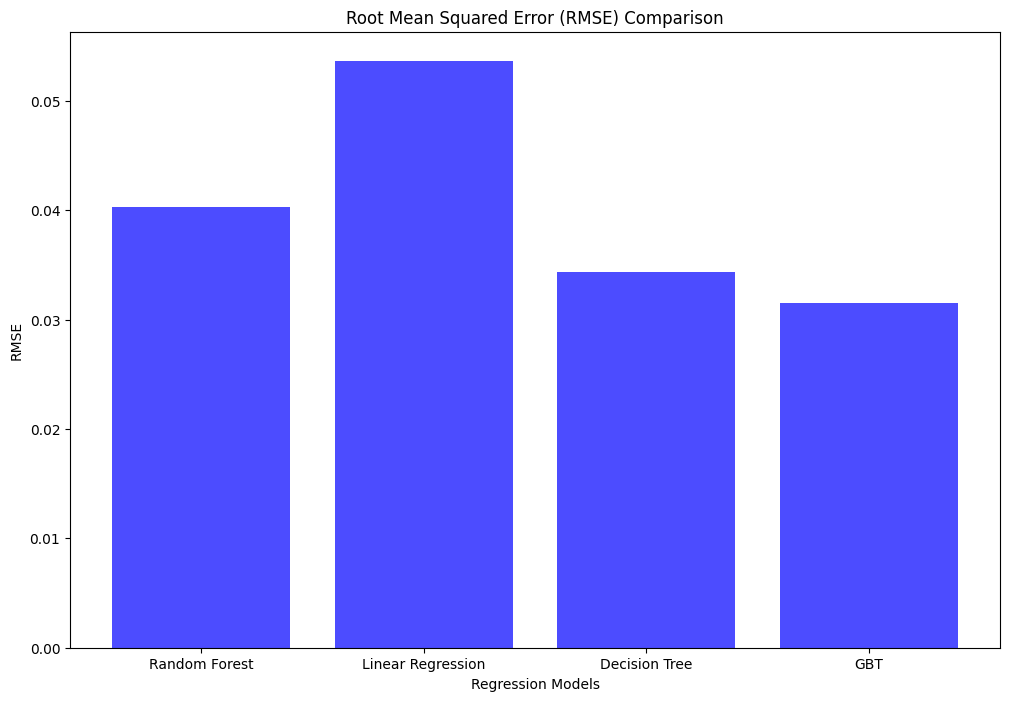

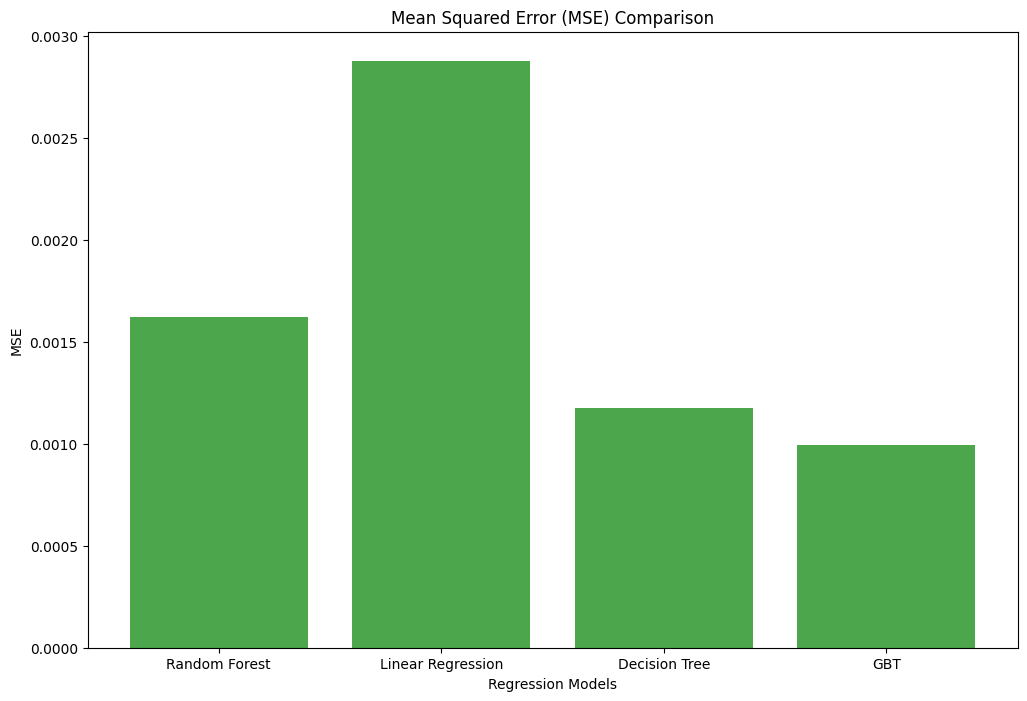

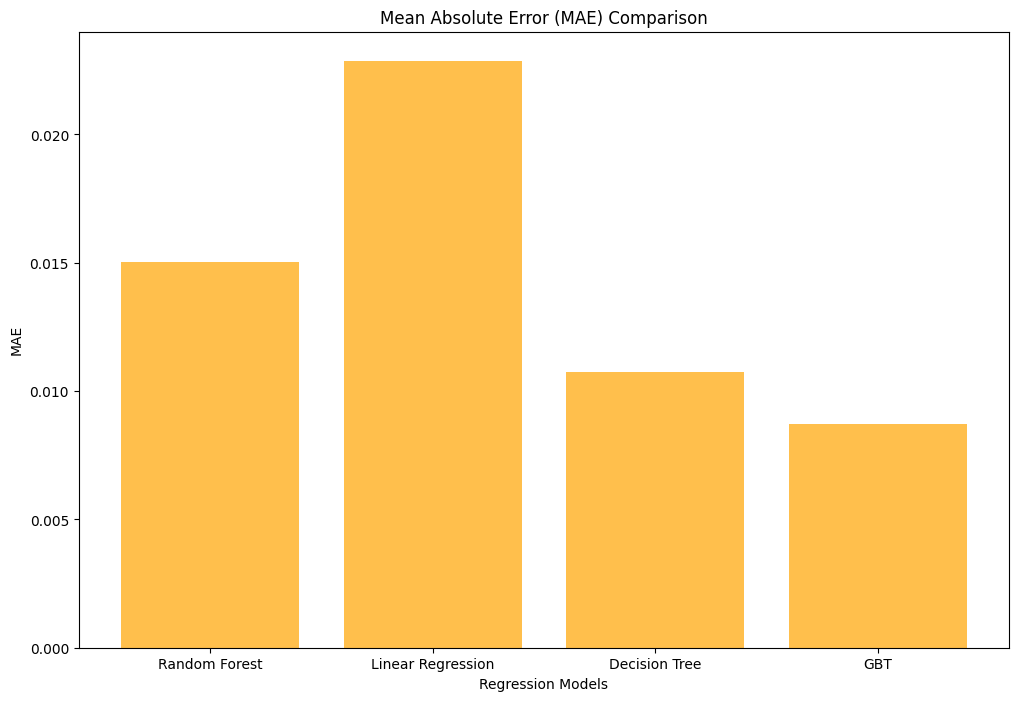

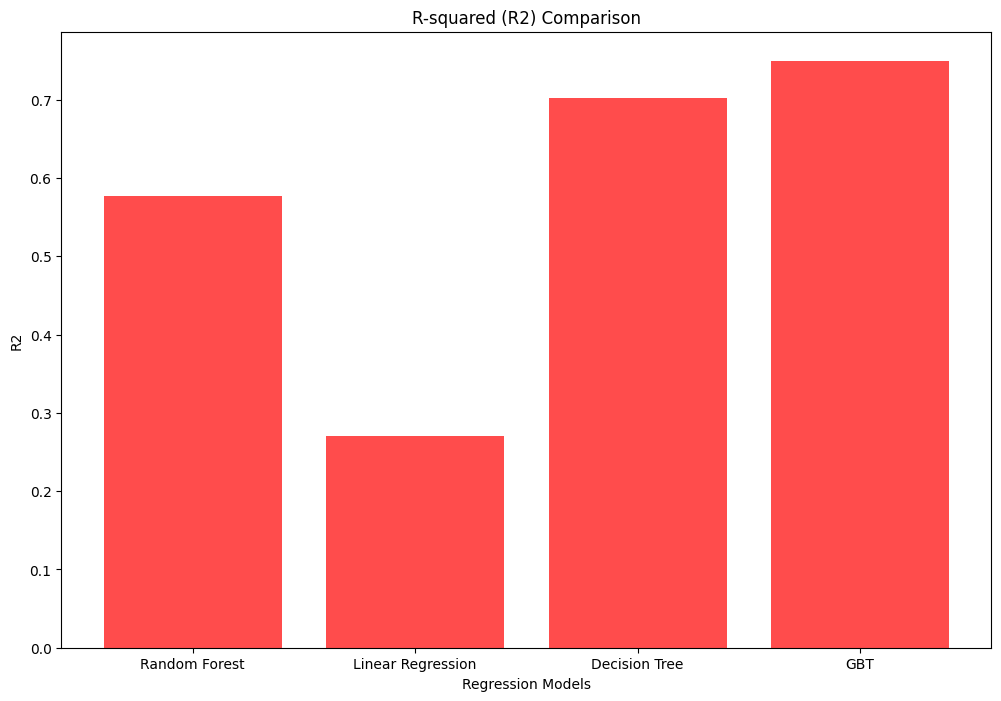

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each algorithm
algorithms = ['Random Forest', 'Linear Regression', 'Decision Tree', 'GBT']
rmse_values = [0.04027390942654569, 0.05363727237465694, 0.034319087885203076, 0.03154395330937195]
mse_values = [0.0016219877804976059, 0.002876956987793136, 0.0011777997932722927, 0.0009950209903838375]
mae_values = [0.015047766068261297, 0.022860362624413075, 0.010739822892662464, 0.008735011353443949]
r2_values = [0.5764596887077857, 0.27078275639923455, 0.7017925066077975, 0.7492254464977792]


# Plotting RMSE
plt.figure(figsize=(12, 8))
plt.bar(algorithms, rmse_values, color='blue', alpha=0.7)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('RMSE')
plt.show()

# Plotting MSE
plt.figure(figsize=(12, 8))
plt.bar(algorithms, mse_values, color='green', alpha=0.7)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.show()

# Plotting MAE
plt.figure(figsize=(12, 8))
plt.bar(algorithms, mae_values, color='orange', alpha=0.7)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.show()

# Plotting R2
plt.figure(figsize=(12, 8))
plt.bar(algorithms, r2_values, color='red', alpha=0.7)
plt.title('R-squared (R2) Comparison')
plt.xlabel('Regression Models')
plt.ylabel('R2')
plt.show()


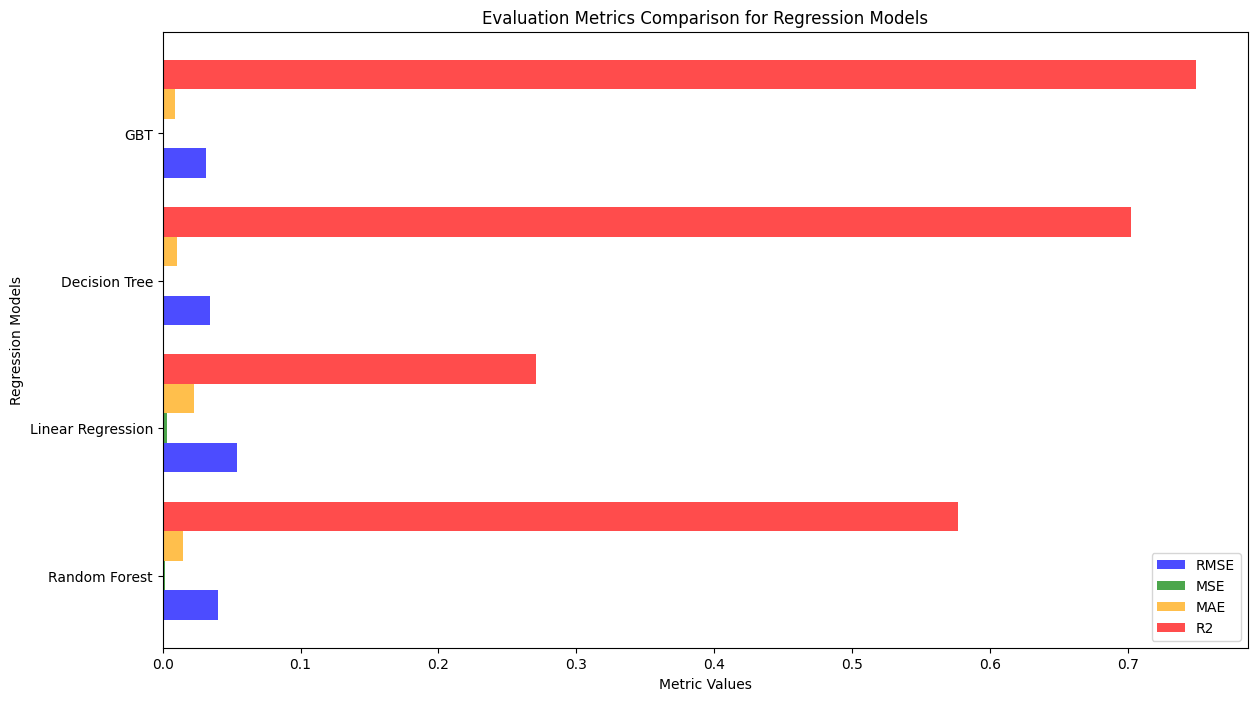

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for each algorithm
algorithms = ['Random Forest', 'Linear Regression', 'Decision Tree', 'GBT']
rmse_values = [0.04027390942654569, 0.05363727237465694, 0.034319087885203076, 0.03154395330937195]
mse_values = [0.0016219877804976059, 0.002876956987793136, 0.0011777997932722927, 0.0009950209903838375]
mae_values = [0.015047766068261297, 0.022860362624413075, 0.010739822892662464, 0.008735011353443949]
r2_values = [0.5764596887077857, 0.27078275639923455, 0.7017925066077975, 0.7492254464977792]

# Combine all metrics for each algorithm
combined_values = np.vstack((rmse_values, mse_values, mae_values, r2_values))

# Set up the bar positions
bar_width = 0.2
bar_positions = np.arange(len(algorithms))

# Plotting combined bar graph
plt.figure(figsize=(14, 8))

# Plot RMSE
plt.barh(bar_positions - bar_width, combined_values[0], height=bar_width, label='RMSE', color='blue', alpha=0.7)

# Plot MSE
plt.barh(bar_positions, combined_values[1], height=bar_width, label='MSE', color='green', alpha=0.7)

# Plot MAE
plt.barh(bar_positions + bar_width, combined_values[2], height=bar_width, label='MAE', color='orange', alpha=0.7)

# Plot R2
plt.barh(bar_positions + 2 * bar_width, combined_values[3], height=bar_width, label='R2', color='red', alpha=0.7)

plt.title('Evaluation Metrics Comparison for Regression Models')
plt.xlabel('Metric Values')
plt.ylabel('Regression Models')
plt.yticks(bar_positions, algorithms)
plt.legend()

plt.show()


TypeError: 'numpy.int64' object is not callable

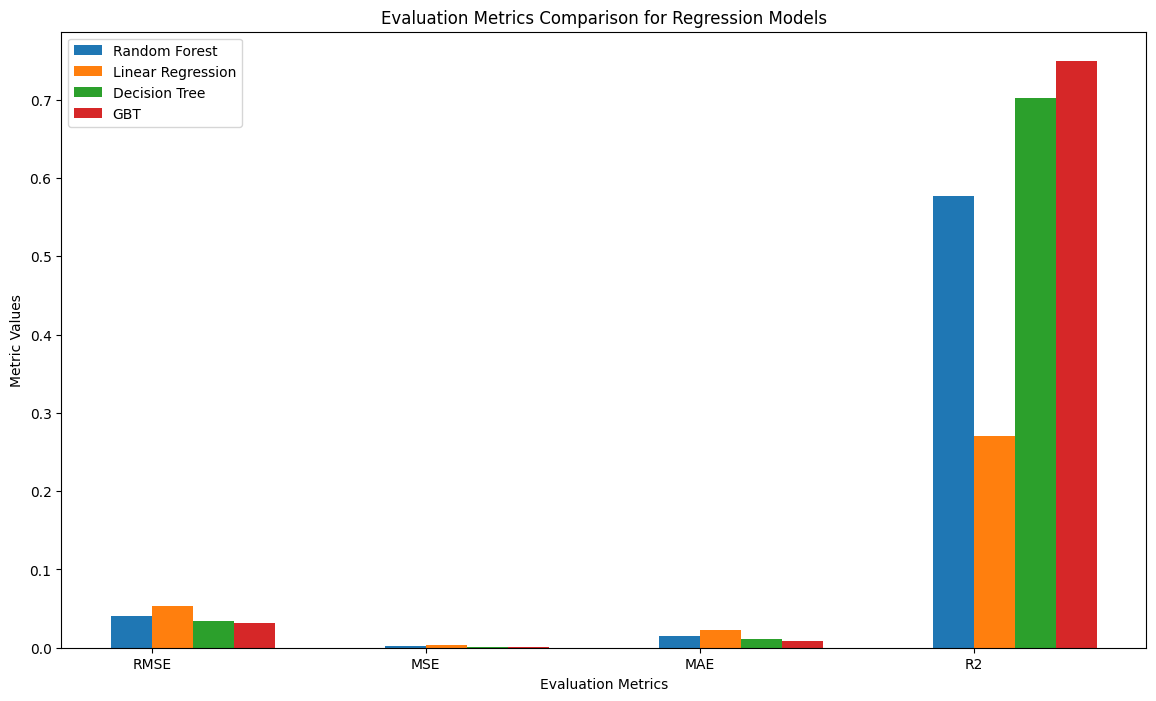

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for each algorithm
algorithms = ['Random Forest', 'Linear Regression', 'Decision Tree', 'GBT']
metrics = ['RMSE', 'MSE', 'MAE', 'R2']
values = [[0.04027390942654569, 0.05363727237465694, 0.034319087885203076, 0.03154395330937195],  # RMSE values
           [0.0016219877804976059, 0.002876956987793136, 0.0011777997932722927, 0.0009950209903838375],  # MSE values
           [0.015047766068261297, 0.022860362624413075, 0.010739822892662464, 0.008735011353443949],  # MAE values
           [0.5764596887077857, 0.27078275639923455, 0.7017925066077975, 0.7492254464977792]]  # R2 values

num_metrics = len(metrics)
num_algorithms = len(algorithms)

bar_width = 0.15
index = np.arange(num_metrics)

fig, ax = plt.subplots(figsize=(14, 8))

for i in range(num_algorithms):
    ax.bar(index + i * bar_width, [values[j][i] for j in range(num_metrics)], bar_width, label=algorithms[i])

ax.set_title('Evaluation Metrics Comparison for Regression Models')
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Metric Values')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Adjust y-axis scale
ax.set_yticks(np.arange(0, max([max(val) for val in values]) + 0.05, 0.05))

plt.show()


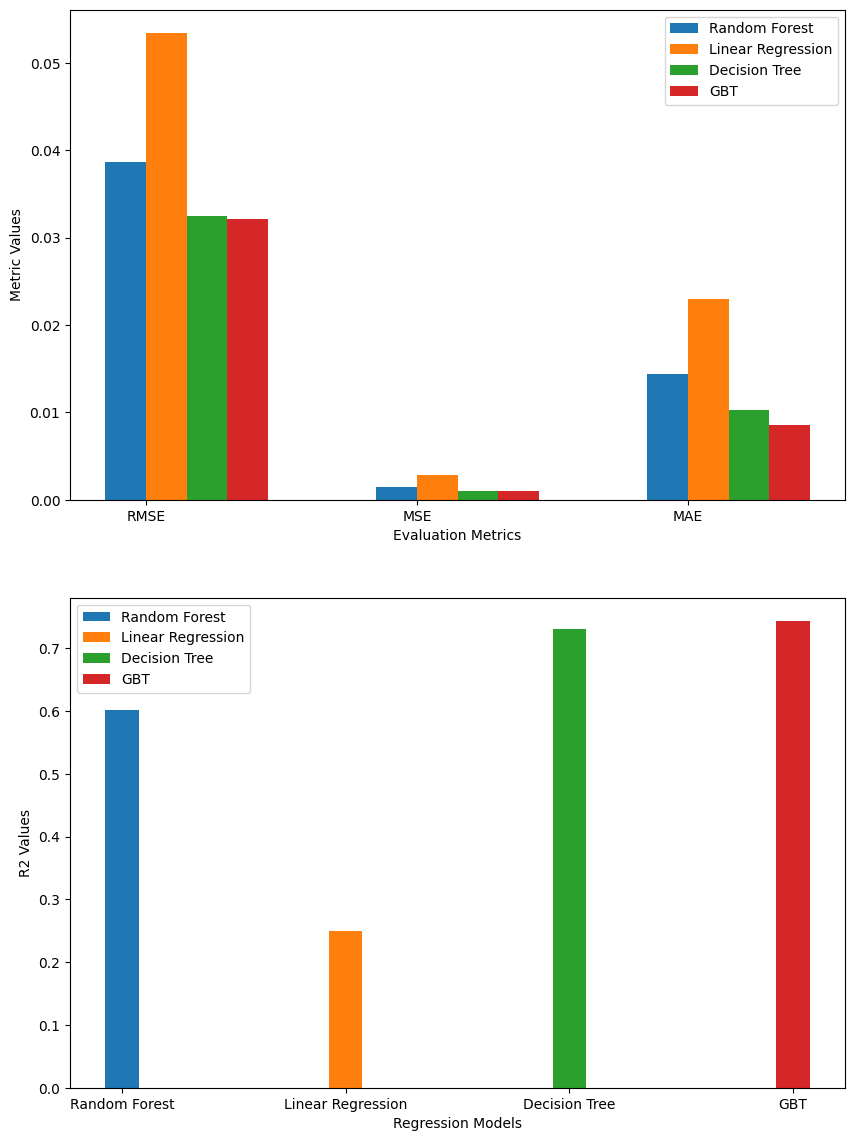

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for each algorithm
algorithms = ['Random Forest', 'Linear Regression', 'Decision Tree', 'GBT']
metrics = ['RMSE', 'MSE', 'MAE', 'R2']
values = [[0.03864, 0.0534, 0.03251, 0.03216],  # RMSE values
           [0.00149, 0.00285, 0.00105, 0.00103 ],  # MSE values
           [0.01438, 0.02292, 0.01022, 0.0085 ],  # MAE values
           [0.60166, 0.25013, 0.7301, 0.7431 ]]  # R2 values

num_metrics = len(metrics)
num_algorithms = len(algorithms)

bar_width = 0.15
index = np.arange(num_metrics - 1)  # Exclude R2

fig, axs = plt.subplots(2, figsize=(10, 14))

# Subplot for RMSE, MSE, and MAE
for i in range(num_algorithms):
    axs[0].bar(index + i * bar_width, [values[j][i] for j in range(num_metrics - 1)], bar_width, label=algorithms[i])

# axs[0].set_title('Evaluation Metrics Comparison for Regression Models (RMSE, MSE, MAE)')
axs[0].set_xlabel('Evaluation Metrics')
axs[0].set_ylabel('Metric Values')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(metrics[:-1])  # Exclude R2
axs[0].legend()

# Subplot for R2
for i in range(num_algorithms):
    axs[1].bar(i, values[-1][i], bar_width, label=algorithms[i])  # Only R2 values

# axs[1].set_title('R2 Comparison for Regression Models')
axs[1].set_xlabel('Regression Models')
axs[1].set_ylabel('R2 Values')
axs[1].set_xticks(np.arange(num_algorithms))
axs[1].set_xticklabels(algorithms)
axs[1].legend()

plt.show()
